# **Support-Vector-Regression**
## (*)Here in this the Line_of_Regression has some extraBoundary or buffer above and below it that tube in whole is called as "epsilon(E)-insensitive_tube", in which the datapoint falling inside it, considered them as errorless donot care error for them, but the datapoints falling outside of the buffer are considered as outliers-having some errors. In them the error is the distance from the point to the buffer only.
## **Equation of Error:**  
###(1/2.||w||^2 + C.SUM[Ei+E*i])------>Minimum  
### {NOTE} Ei for the datapoints error above the TUBE and Ei* for the datapoints error below the TUBE


## (*)This is called Support-Vector_regression because the datapoints are considered as Vectors and the external datapoints dictate how the SVR-line should look wrt for minimising the SVR-error, therefore they supports in minimising the error
### Vectors are one-dimensional-array means a simple homogenouse data containing-array, which are datapoints

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the datasets


In [2]:
from pandas.io.parsers.readers import read_csv
dataset=pd.read_csv("Position_Salaries.csv")

## **Note** : Here we have to impliment the feature_scaling beacuse in SVR we donot have any explict-equation of the dependentVariabe wrt features having co-efficint,,,, Therefore the SVR model has an implicit equation of equation of dependentVariable wrt features without having the coefficint

## (*)Also FeatureScaling is not used in [Simple,MutiVar and Polynomial]_LR as bcz the capacity of the features as predictor is depent on the co-efficient, if there is no coefficient , then featureScaling have to be applied for determination of the capacity of the features in the prediction.

In [3]:
#Separeting X and Y
X=dataset.iloc[:,1:-1].values
Y=dataset.iloc[:,-1].values

In [4]:
print(X) #2D vector or array
print(Y) #1D vector or array

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## (*)Also here we would not doing splitting as bcz minority of datapoints wanted all datasets for training the model to the best

## **FeatureScaling**, in which we have to apply it on both the /IndependentVar and the dependentVar, so that the SVR model would be balanced on both of them, as in SVR_model equation we donot have the coefficient for balancing them

##(1) So if the features having the values from 0 to 1, there Featurescaling is not required
##(2) And if the dpendent Variables having very high values compared to the features , then FS is implimented on both features and dependent Variable
##(3) FS should implimented after the split of training and testing set, implimented on trainingSet for making the model balanced wrt Dependent&Independent_Var


In [5]:
#First reshape the Y into 2D array from 1D as bcz the FS class required 2D vector as its input
Y=Y.reshape(len(Y),1) # Or (-1,1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
# FeatureScaling implimentation of both X and Y:
from sklearn.preprocessing import StandardScaler
#Have FeatureScaling-Object different for X and Y bcz oneObject would used to get the Mean and Sd of X and saved in it or fitted in it and same object can't used for another variable fitting_transforming as it have different Mean and Sd\
#another object would be used for fitting_transform f the Y
sc_x= StandardScaler() #FeatureScaling for X
sc_y= StandardScaler() #FeatureScaling for Y
X=sc_x.fit_transform(X)
Y=sc_y.fit_transform(Y)


In [7]:
print(X)
print()
print(Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on whole dataset for better precision
### **Note**: SVR model has kernel/function , can be a linear and non-lnear according to the complexity of the datasets, for finding the relationship between the datasets

In [8]:
from sklearn.svm import SVR #Importing SVR model from sklearn_library's Support_Vector_Machine
regressor=SVR(kernel='rbf') #Now this model would take an argument as input as the respective kernal_function, which is a type of function selected according to the dataset, used for finding relationships between the inputVectors wrt dependentVar
#Here kernel used is "Radial Basis Kernel" and always recommended for SVR_model
regressor.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the Values
### **Note** : Hence we have trained the model to predict the Y in scaled form with same scaled valued input-X, now after getting the predicted value of Y we have ti downscale the value to its original range value {Reverse Scaling}, similarly we have to pass the same scaled value of X for prediction

In [9]:
#So we have to pass the scaled value of X for the prediction, and get the scaled value of Y
#Scaling 6.5
Y_pred=regressor.predict(sc_x.transform([[6.5]]))
print(Y_pred)#Now we got the output scaled, so we have to downscale it now to in its original range\


[-0.27861589]


## **InverseTransform**  : used for reverse transform of Y_pred

In [10]:
#Here we used InverseTransform method for rescaling
Y_pred1=sc_y.inverse_transform(Y_pred.reshape(-1,1)) #Reshape required as this method also needs 2D_array as input
print(Y_pred1)
#Hence the salary would be "170k" for 6.5 level job

[[170370.0204065]]


In [11]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


## Visualisation of SVR results

<function matplotlib.pyplot.show(close=None, block=None)>

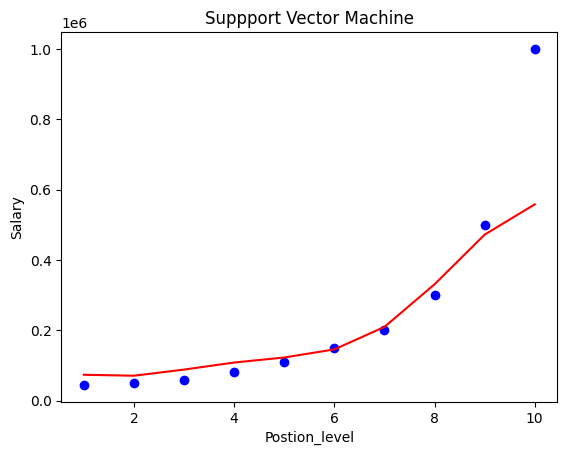

In [12]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),c="b") #Asbcz inside X and Y, scaled values are been stored
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),c="r")
plt.title("Suppport Vector Machine")
plt.xlabel("Postion_level")
plt.ylabel("Salary")
plt.show

## Visualisation of SVR results with more smoothness

In [13]:
# So converted the X into decimal points from integer points for more inputs and outputs, which leds the line smooth
X_grid=np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X))+0.1,0.1) #Arranging from minimum of X to maximum of X with difference 0.1
X_grid1=X_grid.reshape(len(X_grid),1) #Same meaning, to convert the horizontal array into verticle, means column will become 1 from len(X) basically become transpose
X_grid2=X_grid.reshape(-1,1) #Same meaning as above but from CN procedure
print(X_grid)

[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3
  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7
  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1
  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5
  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9
  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3
  9.4  9.5  9.6  9.7  9.8  9.9 10. ]


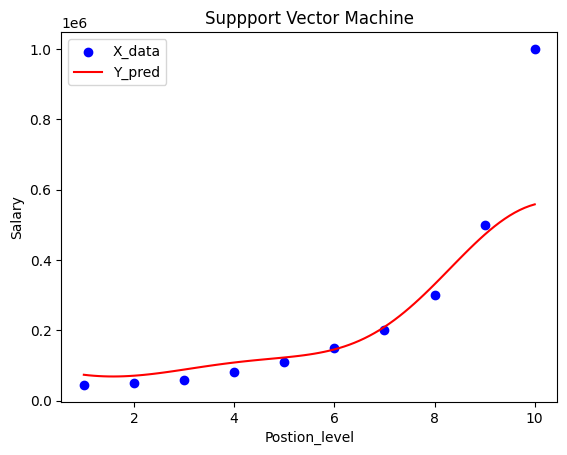

In [14]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),c="b",label="X_data") #Asbcz inside X and Y, scaled values are been stored
plt.plot(X_grid1,sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid1)).reshape(-1,1)),c="r",label="Y_pred")
plt.title("Suppport Vector Machine")
plt.xlabel("Postion_level")
plt.legend()
plt.ylabel("Salary")
plt.show()